In [4]:
# Time Series Forcasting with Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


16:16:18 - cmdstanpy - INFO - Chain [1] start processing
16:16:18 - cmdstanpy - INFO - Chain [1] done processing


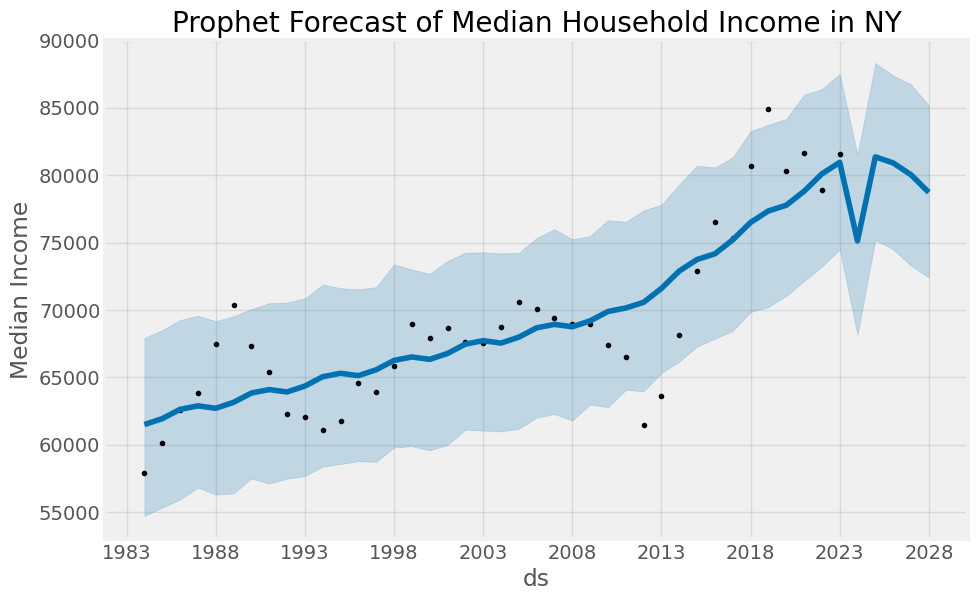

In [6]:
# Median Household Income NY analysis
df_income = pd.read_csv("MedianHouseholdIncome.csv")
df_income["observation_date"] = pd.to_datetime(df_income["observation_date"])
df_income = df_income.rename(columns={"observation_date": "ds", "MEHOINUSNYA672N": "y"})
m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_income)
future_income = m_income.make_future_dataframe(periods=5, freq="YE")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Median Household Income in NY")
plt.ylabel("Median Income")
plt.show()

In [5]:
pjme = pd.read_csv('MedianHouseholdIncome.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.head()


,MEHOINUSNYA672N
observation_date,
1984-01-01,57910
1985-01-01,60100
1986-01-01,62600
1987-01-01,63840
1988-01-01,67470
